<a href="https://colab.research.google.com/github/klakins/ProjectsPortfolio/blob/main/credit_risk_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Credit Risk Analysis: Predicting Loan Default

* In this project, the primary goal is to  predict the likelihood of a customer defaulting on a loan using logistic regression


* Data was sourced from Kaggle

**Feature Description**

* person_age: Age of the person.
* person_income: Annual income of the person.
* person_home_ownership: Type of home ownership (rent, own, mortgage).
* person_emp_length: Employment length in months.
* loan_intent: Purpose of the loan (e.g., personal, education, medical).
* loan_amnt: Amount of the loan.
* loan_int_rate: Interest rate of the loan.
* loan_status: Loan status (1 indicates default, 0 indicates non-default).
* loan_percent_income: Percentage of the person's income that goes to the loan.
* cb_person_default_on_file: Whether the person has defaulted on credit before (Y/N).
* cb_person_cred_hist_length: Length of the person's credit history in years.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
credit_risk_data = pd.read_csv('data/credit_risk_dataset.csv')
credit_risk_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


In [3]:
credit_risk_data.shape

(32581, 11)

In [4]:
# checking for null values. employment
credit_risk_data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

Employment length and loan interest rate are critical features in understanding the likelihood of a customer defaulting on a loan. Employment length can be a strong indicator of financial stability, and the interest rate can affect a borrower's ability to repay a loan.

As part of cleaning the data, I will use an imputation method. If the distribution of the data is normally distributed,

I will impute using the mean, if otherwise, I will use the median

In [5]:
# Summarized statistical properties of the numerical features.
credit_risk_data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


# EDA

In [6]:
# check for duplicate rows
duplicates =credit_risk_data[credit_risk_data.duplicated()]

# Count the number of duplicates
num_duplicates = duplicates.shape[0]
print(f'Number of duplicate rows: {num_duplicates}')

# Inspect first and last 40 cols of the 'duplicate rows' to understand their nature
# These records are not true duplicates and will not be droppped
duplicates.sort_values(by = 'person_age').head(40)
duplicates.sort_values(by = 'person_age').tail(40)

Number of duplicate rows: 165


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
28665,27,38400,RENT,6.0,MEDICAL,5000,9.88,0,0.13,N,10
28205,27,84906,MORTGAGE,11.0,DEBTCONSOLIDATION,4500,7.51,0,0.05,N,10
28973,27,62000,MORTGAGE,1.0,HOMEIMPROVEMENT,3275,9.33,0,0.05,N,8
29109,27,78000,MORTGAGE,1.0,VENTURE,5125,8.59,0,0.07,N,8
27906,27,100000,MORTGAGE,11.0,PERSONAL,14400,NaN,0,0.14,N,8
29082,27,110000,MORTGAGE,11.0,HOMEIMPROVEMENT,3600,6.03,0,0.03,N,5
28460,27,24000,RENT,2.0,MEDICAL,1450,NaN,0,0.06,N,9
28838,27,42000,RENT,1.0,EDUCATION,10000,NaN,0,0.24,N,8
28150,28,80004,MORTGAGE,5.0,MEDICAL,12000,6.91,0,0.15,N,6
29047,28,34000,RENT,NaN,PERSONAL,5000,7.90,1,0.15,N,5


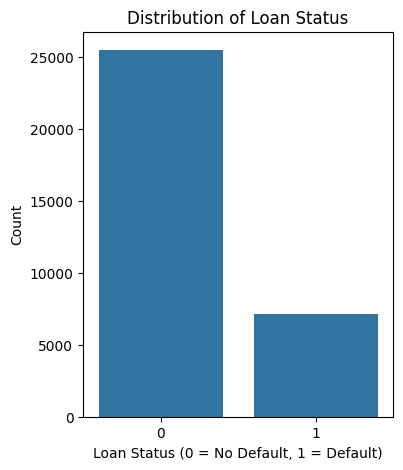

In [7]:
# Plot the distribution of loan status
plt.figure(figsize=(4, 5))
sns.countplot(data=credit_risk_data, x='loan_status')
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status (0 = No Default, 1 = Default)')
plt.ylabel('Count')
plt.show()

In [8]:
credit_risk_data.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_amnt', 'loan_int_rate',
       'loan_status', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length'],
      dtype='object')

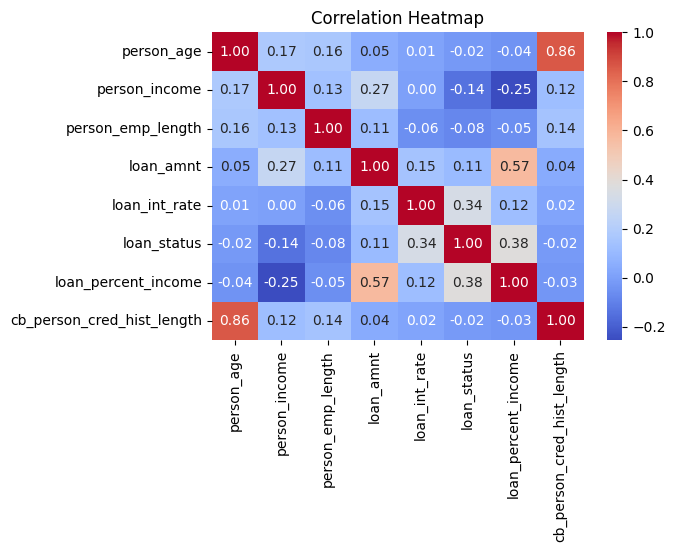

In [9]:
# Calculate the correlation matrix
corr_features = credit_risk_data[['person_age', 'person_income','person_emp_length', 'loan_amnt',
                 'loan_int_rate','loan_status', 'loan_percent_income',
                 'cb_person_cred_hist_length']]
corr_matrix = corr_features.corr()

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Data Cleaning**

In [10]:
def clean_credit_risk_data(dataset):

    # Remove rows where age > 80
    dataset = dataset[dataset['person_age'] <= 80]

    # Remove rows where employment length is > 70b
    dataset = dataset[dataset['person_emp_length'] <= 70]


    # Remove white space and lowercase all characters
    dataset = dataset.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)


    # Rename columns
    dataset.rename(columns = {'person_age':'age',
                             'person_income': 'income',
                             'person_home_ownership': 'home_ownernship_status',
                             'person_emp_length': 'employment_length',
                             'loan_percent_income': 'percent_of_income',
                             'cb_person_default_on_file': 'historical_default',
                             'cb_person_cred_hist_length':'credit_history_length '},inplace = True)

    # Convert 'y' to 1 and 'n' to 0 in the 'historical_default' column
    dataset['historical_default'] = dataset['historical_default'].astype(str).replace({'y': '1', 'n': '0'})

    # Convert the column to numeric type
    dataset['historical_default'] = pd.to_numeric(dataset['historical_default'], errors='coerce')

    return dataset

# Clean the credit risk dataset using the function
cr_data = clean_credit_risk_data(credit_risk_data.copy())

# Print the cleaned dataset
cr_data.head()

,age,income,home_ownernship_status,employment_length,loan_intent,loan_amnt,loan_int_rate,loan_status,percent_of_income,historical_default,credit_history_length
1,21,9600,own,5.0,education,1000,11.14,0,0.10,0,2
2,25,9600,mortgage,1.0,medical,5500,12.87,1,0.57,0,3
3,23,65500,rent,4.0,medical,35000,15.23,1,0.53,0,2
4,24,54400,rent,8.0,medical,35000,14.27,1,0.55,1,4
5,21,9900,own,2.0,venture,2500,7.14,1,0.25,0,2


In [11]:
# upon cleaning the dataset, employment length has no null values, but loan interest rate still has null values.
cr_data.isnull().sum()

age                          0
income                       0
home_ownernship_status       0
employment_length            0
loan_intent                  0
loan_amnt                    0
loan_int_rate             3046
loan_status                  0
percent_of_income            0
historical_default           0
credit_history_length        0
dtype: int64

In [12]:
# apply imputation using with the median for the loan_interest rate col

from sklearn.impute import SimpleImputer

# Print NaN values before imputation
print("NaN values before imputation:")
print(cr_data[['loan_int_rate']].isnull().sum())

# Impute missing values with the median
loan_int_rate_imputer = SimpleImputer(strategy='median')
cr_data['loan_int_rate'] = loan_int_rate_imputer.fit_transform(cr_data[['loan_int_rate']])

# Confirmation of NaN values after imputation
print("NaN values after imputation:")
print(cr_data[['loan_int_rate']].isnull().sum())

NaN values before imputation:
loan_int_rate    3046
dtype: int64
NaN values after imputation:
loan_int_rate    0
dtype: int64


In [13]:
#Feature engineering for additional insights

cr_data['monthly_income'] = cr_data['income']/12
cr_data['debt_to_income_ratio'] = (cr_data['loan_amnt']/cr_data['monthly_income']) * 100
cr_data['loan_to_income_ratio'] = (cr_data['loan_amnt']/cr_data['income']) * 100

In [14]:
# The skewness value for loan interest rate is relatively low, while for the others variables, the skewness is moderately positve.
# Because of the skewness values(indicating low and moderate skewness), no additional transformation will be applied

skewness = cr_data[['loan_int_rate','loan_amnt','employment_length', 'debt_to_income_ratio','loan_to_income_ratio']].skew()
print("Skewness of original columns:\n",skewness)

Skewness of original columns:
 loan_int_rate           0.219305
loan_amnt               1.181798
employment_length       1.247811
debt_to_income_ratio    1.069394
loan_to_income_ratio    1.069394
dtype: float64


In [15]:
# Encode categorical features
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
encoded_home_ownership= encoder.fit_transform(cr_data[['home_ownernship_status']])
encoded_loan_intent= encoder.fit_transform(cr_data[['loan_intent']])

cr_data['encoded_home_ownernship_status'] = encoded_home_ownership
cr_data['encoded_loan_intent'] = encoded_loan_intent

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# List of features to be included in the model
drop_features = cr_data.columns.drop(['loan_status', 'home_ownernship_status','loan_intent'])

# List of features to be included in the model
features = ['age', 'income',  'employment_length','loan_amnt', 'loan_int_rate',
            'percent_of_income', 'historical_default', 'credit_history_length ',
            'monthly_income', 'debt_to_income_ratio', 'loan_to_income_ratio',
            'encoded_home_ownernship_status', 'encoded_loan_intent']

# Initialize the scaler
scaler = StandardScaler()

# Normalize the features
cr_data[features] = scaler.fit_transform(cr_data[features])


# features and target
X = cr_data[features]
y = cr_data['loan_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000, solver='liblinear')
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.8369633838383839
Precision: 0.7165841584158416
Recall: 0.41865509761388287
F1 Score: 0.5285257873117298


In [17]:
# 0 indicates no default, 1 indicates default
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head(30))  # Print the first 10 results for brevity

       Actual  Predicted
4353        1          1
4217        0          0
2916        0          0
13726       0          0
12997       0          0
15694       0          0
6409        1          1
16851       1          1
23162       1          1
15381       1          0
16988       0          0
2656        0          0
8216        0          0
6254        0          1
13008       0          0
26447       0          0
11572       0          0
16753       1          0
17279       0          0
15508       0          0
29138       0          0
3878        0          0
26163       0          0
5087        0          0
4539        0          0
9485        1          0
2836        0          0
8830        1          0
5392        0          0
10777       0          0


Future considerations
- Apply log transformation to handle skewed distribution